In [1]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns

# EDA

In [369]:
df = pd.read_csv(r'bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Visualization 

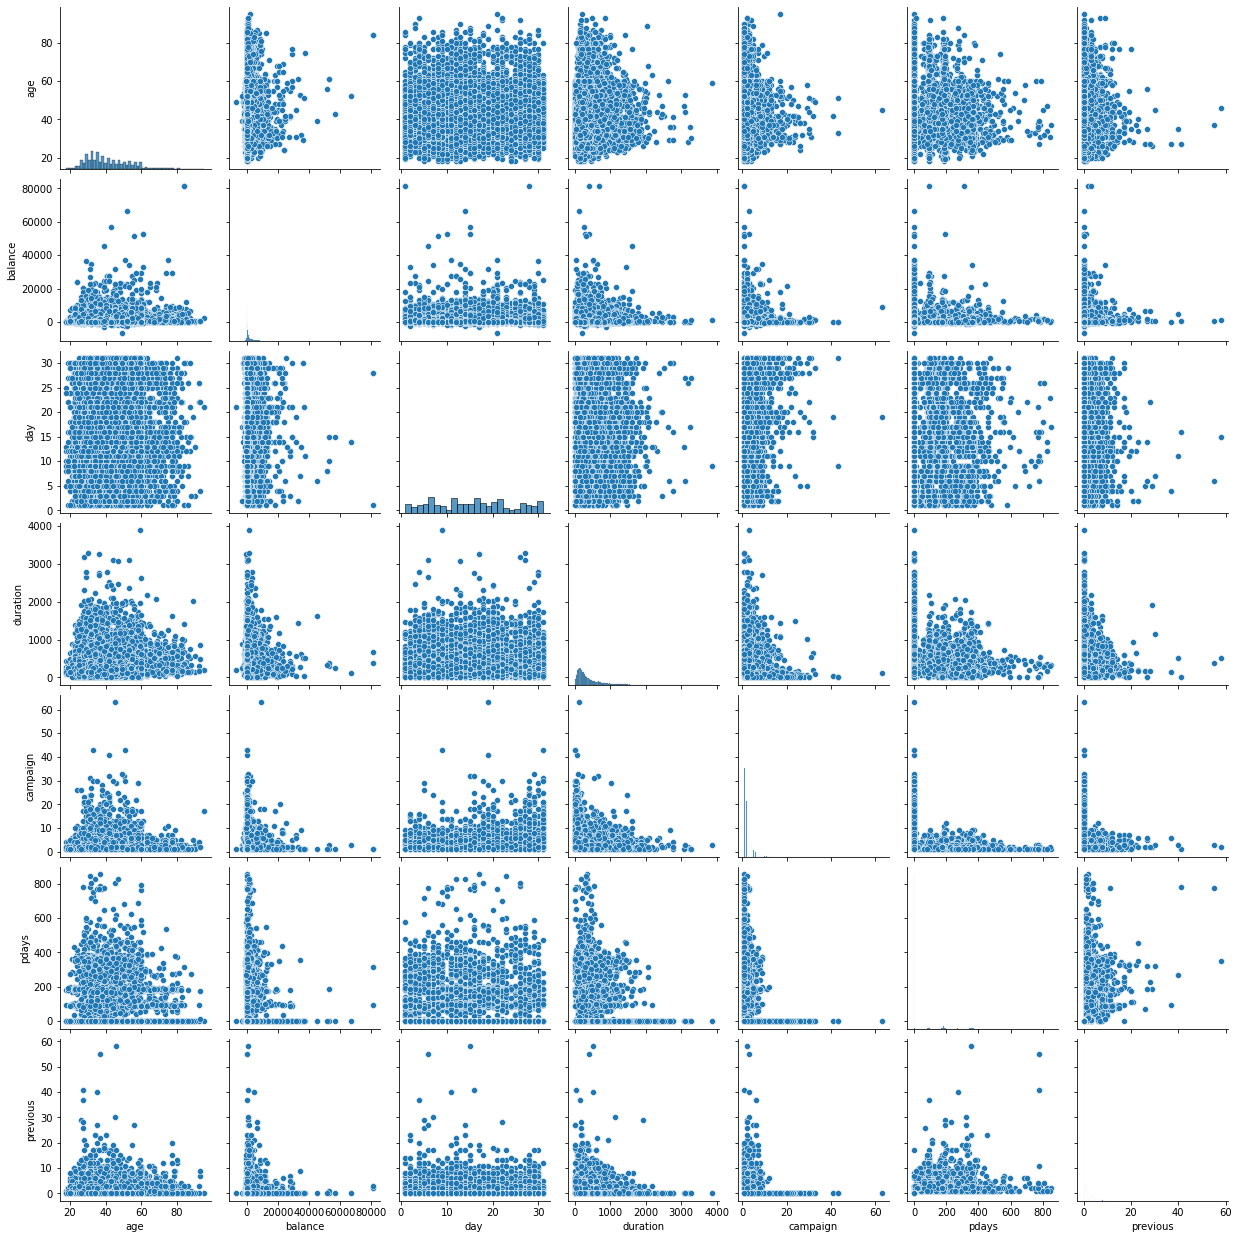

In [ ]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5afe88cb50>,
      dtype=object)

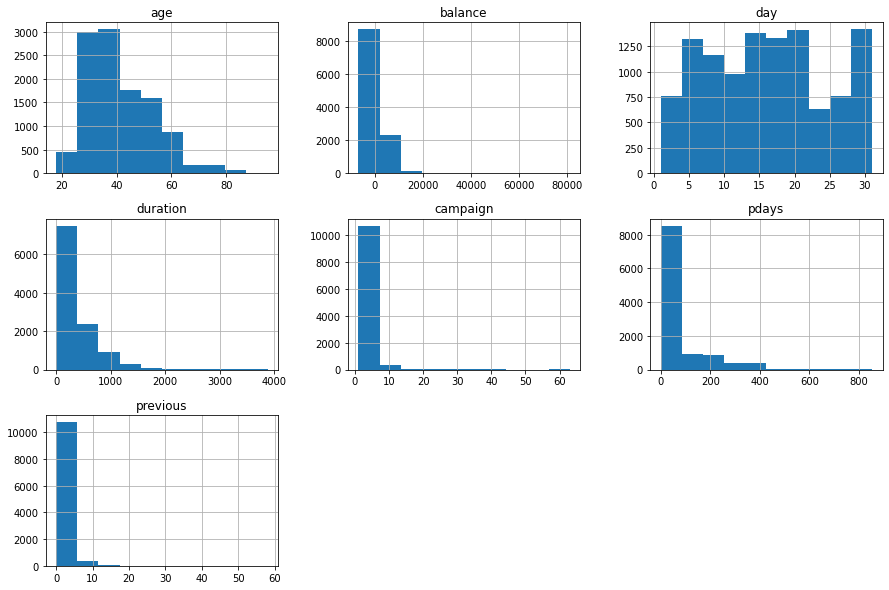

In [ ]:
df.hist(figsize=(15,10))

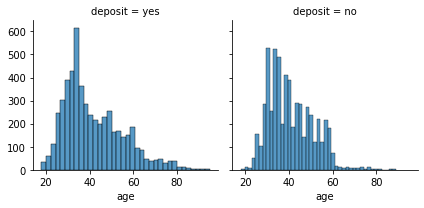

In [ ]:
#Age
g = sns.FacetGrid(df,col='deposit')
g.map(sns.histplot, "age")

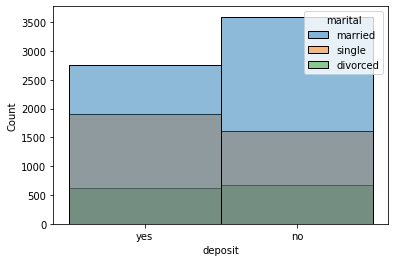

In [ ]:
sns.histplot(df,x='deposit',hue='marital')

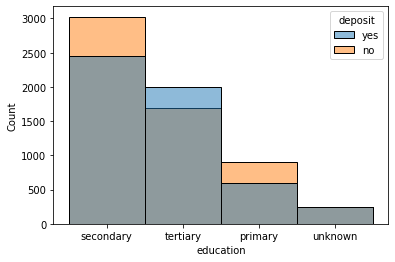

In [ ]:
sns.histplot(df,x='education',hue='deposit')

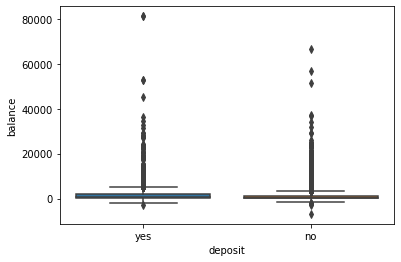

In [ ]:
sns.boxplot(x=df['deposit'],y=df['balance'])

## Preprocessing and cleaning

In [330]:
#Checking the null values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [331]:
#Selecting the categorical features 
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


In [332]:
#Printing the different values that can take each of the categorical features  
for i in obj_df.columns : 
  print(i," :",obj_df[i].unique())

job  : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital  : ['married' 'single' 'divorced']
education  : ['secondary' 'tertiary' 'primary' 'unknown']
default  : ['no' 'yes']
housing  : ['yes' 'no']
loan  : ['no' 'yes']
contact  : ['unknown' 'cellular' 'telephone']
month  : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome  : ['unknown' 'other' 'failure' 'success']
deposit  : ['yes' 'no']


There are variables with unknown values <br>
We can see that the features job,education,contact have unknown values <br>

In [333]:
(df == 'unknown').sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

In [370]:
p_u_poutcome = (8326*100)/11162 #percantages of unknown value in poutcome feature
print('poutcome contains :',np.round(p_u_poutcome,2),'% of unknown values')

poutcome contains : 74.59 % of unknown values


Poutcome feature contains 74% of unknown values, we can drop the column


In [371]:
df.drop('poutcome',axis=1,inplace=True)

For the features job, education and contact, we replace the unknown values with the mode  

In [372]:
print('The mode for each feature :')
print('job :',df['job'].mode()[0])
print('contact :',df['contact'].mode()[0])
print('education :',df['education'].mode()[0])

The mode for each feature :
job : management
contact : cellular
education : secondary


In [373]:
df['job']=df['job'].replace('unknown',df['job'].mode()[0])
df['contact']=df['contact'].replace('unknown',df['contact'].mode()[0])
df['education']=df['education'].replace('unknown',df['education'].mode()[0])

In [338]:
(df == 'unknown').sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

### Converting categorical features into numerical

In [374]:
#we use one hot encoding 
obj_df = df.select_dtypes(include=['object']).copy()
df = pd.get_dummies(df, columns = obj_df.drop('deposit',axis=1).columns)

In [375]:
df.replace({'yes':1,'no':0} , inplace=True)

In [376]:
X = df.drop('deposit',axis=1)
Y = df['deposit']

### Normalize

In [377]:
from sklearn.preprocessing import normalize
X = normalize(X)

In [378]:
#Splitting the dataset into training and testing 
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [379]:
x_train.shape

(8929, 44)

In [ ]:
#Building the model
model= Sequential([
   Dense(1000,input_dim=44,activation='relu'),    
   Dense(500,activation='relu'),
   Dense(50,activation='relu'),
   Dense(1,activation='sigmoid')
   ])


batch_size = 128
epochs = 40 
lr = 0.0015

model.compile(loss='binary_crossentropy',
              optimizer=Adamax(learning_rate=lr),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1
                    )

Epoch 1/40
70/70 [==============================] - 1s 15ms/step - loss: 0.6018 - binary_accuracy: 0.6632
Epoch 2/40
70/70 [==============================] - 1s 15ms/step - loss: 0.5348 - binary_accuracy: 0.7365
Epoch 3/40
70/70 [==============================] - 1s 15ms/step - loss: 0.5252 - binary_accuracy: 0.7431
Epoch 4/40
70/70 [==============================] - 1s 15ms/step - loss: 0.5094 - binary_accuracy: 0.7555
Epoch 5/40
70/70 [==============================] - 1s 15ms/step - loss: 0.5019 - binary_accuracy: 0.7541
Epoch 6/40
70/70 [==============================] - 1s 15ms/step - loss: 0.4958 - binary_accuracy: 0.7607
Epoch 7/40
70/70 [==============================] - 1s 15ms/step - loss: 0.4895 - binary_accuracy: 0.7634
Epoch 8/40
70/70 [==============================] - 1s 15ms/step - loss: 0.4867 - binary_accuracy: 0.7691
Epoch 9/40
70/70 [==============================] - 1s 15ms/step - loss: 0.4778 - binary_accuracy: 0.7721
Epoch 10/40
70/70 [===========================

In [344]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8293775320053101
